<a href="https://colab.research.google.com/github/Akshaya21513/Codeway/blob/main/Task3(Customer_Churn_Prediction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TASK - 3 (CUSTOMER CHURN PREDICTION)**

Develop a model to predict customer churn for a subscription- based
service or business. Use historical customer data, including features like
usage behavior and customer demographics, and try algorithms like
Logistic Regression, Random Forests, or Gradient Boosting to predict
churn.

#**Load dataset**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/csv/Churn_Modelling.csv")

#**Data Preparation**


In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

##**Feature Engineering**

In [ ]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
#remove null
df.dropna(inplace = True)

In [ ]:
df['Surname'].value_counts()

Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: Surname, Length: 2932, dtype: int64

##**Visualize data**

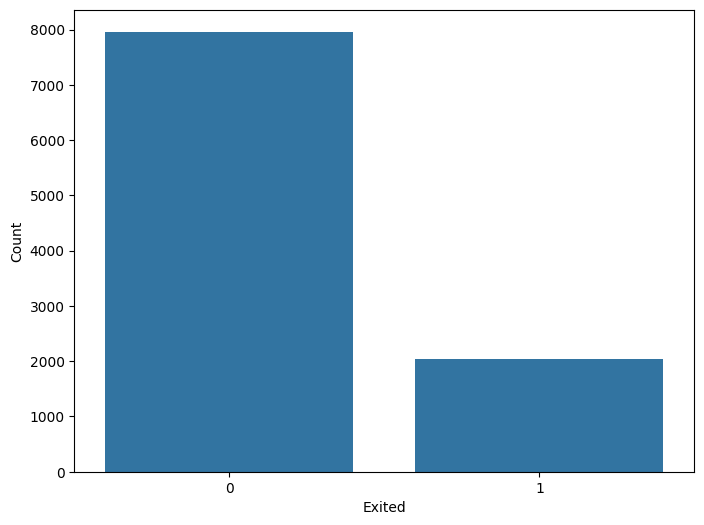

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
sns.countplot(x='Exited',data = df)
plt.xlabel("Exited")
plt.ylabel("Count")
plt.show()

##**Chnage data type to numbericals**

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df1 = df.apply(LabelEncoder().fit_transform)
df1

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,2736,1115,228,0,0,24,2,0,0,1,1,5068,1
1,1,3258,1177,217,2,0,23,1,743,0,0,1,5639,0
2,2,2104,2040,111,0,0,24,8,5793,2,1,0,5707,1
3,3,5435,289,308,0,0,21,1,0,1,0,0,4704,0
4,4,6899,1822,459,2,0,25,2,3696,0,1,1,3925,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,1599,1999,380,0,1,21,5,0,1,1,0,4827,0
9996,9996,161,1336,125,0,1,17,10,124,0,1,1,5087,0
9997,9997,717,1570,318,0,0,18,7,0,0,0,1,2062,1
9998,9998,4656,2345,381,1,1,24,3,427,1,1,0,4639,1


In [ ]:
df1['Surname'].value_counts()

2473    32
2389    29
1689    29
2751    28
336     26
        ..
1307     1
285      1
288      1
2194     1
363      1
Name: Surname, Length: 2932, dtype: int64

##**Data separation as x and y**

In [ ]:
y = df1['Exited']
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [ ]:
X = df1.drop('Exited',axis=1)
X

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0,2736,1115,228,0,0,24,2,0,0,1,1,5068
1,1,3258,1177,217,2,0,23,1,743,0,0,1,5639
2,2,2104,2040,111,0,0,24,8,5793,2,1,0,5707
3,3,5435,289,308,0,0,21,1,0,1,0,0,4704
4,4,6899,1822,459,2,0,25,2,3696,0,1,1,3925
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,1599,1999,380,0,1,21,5,0,1,1,0,4827
9996,9996,161,1336,125,0,1,17,10,124,0,1,1,5087
9997,9997,717,1570,318,0,0,18,7,0,0,0,1,2062
9998,9998,4656,2345,381,1,1,24,3,427,1,1,0,4639


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   RowNumber        10000 non-null  int64
 1   CustomerId       10000 non-null  int64
 2   Surname          10000 non-null  int64
 3   CreditScore      10000 non-null  int64
 4   Geography        10000 non-null  int64
 5   Gender           10000 non-null  int64
 6   Age              10000 non-null  int64
 7   Tenure           10000 non-null  int64
 8   Balance          10000 non-null  int64
 9   NumOfProducts    10000 non-null  int64
 10  HasCrCard        10000 non-null  int64
 11  IsActiveMember   10000 non-null  int64
 12  EstimatedSalary  10000 non-null  int64
dtypes: int64(13)
memory usage: 1015.8 KB


##**Balance Data**

In [ ]:
y.value_counts()  #unbalanced

0    7963
1    2037
Name: Exited, dtype: int64

<Axes: ylabel='Exited'>

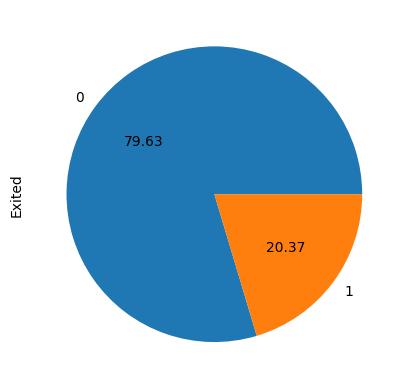

In [ ]:
y.value_counts().plot.pie(autopct='%.2f')   #plot is pandas built in pandas

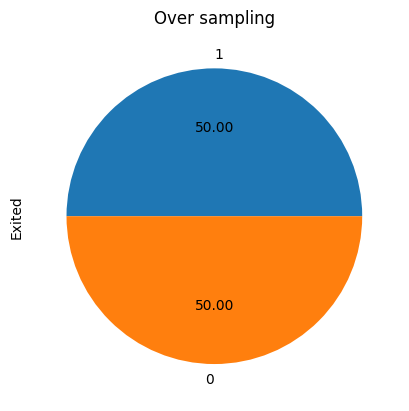

In [ ]:
#random over sampling
from imblearn.over_sampling import RandomOverSampler
#ros = RadnomeOverSampler(sampling_strategy=1)#Float
ros = RandomOverSampler(sampling_strategy = "not majority") #STRING
X_res,y_res = ros.fit_resample(X,y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_= ax.set_title("Over sampling")

In [ ]:
y_res.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

##**data splitting**

X = X_res
y = y_res


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size = 0.2,random_state=100)

In [ ]:
X_train

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9500,9500,3188,1997,348,2,0,9,8,1509,0,1,1,5370
575,575,3479,1037,155,0,0,9,8,0,1,1,1,744
9550,9550,6236,849,378,0,0,22,9,4397,0,1,1,2477
12034,6058,4767,396,277,1,1,38,9,2444,0,1,0,6738
9536,9536,2630,741,159,1,0,24,10,3983,0,1,0,3126
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12119,7876,7662,1703,232,0,1,27,0,0,0,1,0,9814
8039,8039,8304,204,281,0,0,25,4,1118,1,1,1,8354
14147,4629,4853,1046,459,1,1,31,8,1485,0,1,0,5969
6936,6936,4558,1212,201,0,0,13,2,752,1,0,1,5834


In [ ]:
X_test

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
5601,5601,4737,634,313,2,0,26,9,5588,0,1,0,7938
901,901,5761,1252,252,0,1,18,7,5832,1,0,1,4204
5665,5665,8008,1437,168,0,1,15,9,2448,1,1,0,5540
13043,4911,5009,2899,17,2,1,19,1,0,0,1,1,2405
5153,5153,5057,165,304,0,0,11,9,0,1,1,0,5597
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13432,7565,2259,570,317,0,1,34,10,1985,0,1,0,5
605,605,9942,1515,210,0,1,11,9,0,0,1,1,4005
3490,3490,9734,2349,62,0,1,11,6,0,0,0,0,9917
477,477,9755,90,220,0,0,22,8,1639,1,1,0,7407


#**Model Building**

##a)Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
lr = LogisticRegression(max_iter=1000)  #ConvergenceWarning

In [ ]:
# training the Logistic Regression Model with Training Data
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

###Applying the model to make a prediction

In [ ]:
y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)

In [ ]:
y_lr_train_pred  #these are all the predictions

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
y_lr_test_pred

array([1, 0, 0, ..., 0, 1, 1])

###**Evaluate model performance**

Accuracy *Score*

to check if the actual value is equal to the predicted

aka y_train_pred and y_test_pred

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [ ]:
# accuracy on training data
training_data_accuracy1 = accuracy_score(y_lr_train_pred, y_train)

In [ ]:
print('Accuracy on Training data : ', training_data_accuracy1)


Accuracy on Training data :  0.7002354788069074


In [ ]:
# accuracy on test data
test_data_accuracy1 = accuracy_score(y_lr_test_pred, y_test)

In [ ]:
print('Accuracy score on Test Data : ', test_data_accuracy1)


Accuracy score on Test Data :  0.6933458882611425


In [ ]:
#presentation
results = pd.DataFrame(['Logistic Regression', lr_train_mse,lr_train_r2,lr_test_mse,lr_test_r2,training_data_accuracy1,test_data_accuracy1]).transpose()
results.columns = ['Method','Training MSE', 'Training R2', 'Test MSE', ' Test R2','Training Accuracy Score','Test Accuracy Score']

In [ ]:
results

,Method,Training MSE,Training R2,Test MSE,Test R2,Training Accuracy Score,Test Accuracy Score
0,Logistic Regression,0.299765,-0.199086,0.306654,-0.227081,0.700235,0.693346


##b)Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=2, random_state = 100)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=2, random_state=100)

###Applying the model to make a prediction

In [ ]:
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

###**Evaluate model performance**

Accuracy *Score*

to check if the actual value is equal to the predicted

aka y_train_pred and y_test_pred

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [ ]:
# accuracy on training data
training_data_accuracy2 = accuracy_score(y_rf_train_pred, y_train)

In [ ]:
print('Accuracy on Training data : ', training_data_accuracy2)


Accuracy on Training data :  0.7480376766091051


In [ ]:
# accuracy on test data
test_data_accuracy2 = accuracy_score(y_rf_test_pred, y_test)

In [ ]:
print('Accuracy score on Test Data : ', test_data_accuracy2)


Accuracy score on Test Data :  0.7382297551789078


In [ ]:
#presentation
results2 = pd.DataFrame(['Random Forest Classifier', rf_train_mse,rf_train_r2,rf_test_mse,rf_test_r2,training_data_accuracy2,test_data_accuracy2]).transpose()
results2.columns = ['Method','Training MSE', 'Training R2', 'Test MSE', ' Test R2','Training Accuracy Score','Test Accuracy Score']

In [ ]:
results2

,Method,Training MSE,Training R2,Test MSE,Test R2,Training Accuracy Score,Test Accuracy Score
0,Random Forest Classifier,0.251962,-0.007873,0.26177,-0.047478,0.748038,0.73823


In [ ]:
# ----Tere ka begins from here

##c) Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(max_depth=2, random_state=100)
gb.fit(X_train, y_train)


GradientBoostingClassifier(max_depth=2, random_state=100)

###Applying the model to make a prediction

In [ ]:
y_gb_train_pred = gb.predict(X_train)
y_gb_test_pred = gb.predict(X_test)

###**Evaluate model performance**

Accuracy *Score*

to check if the actual value is equal to the predicted

aka y_train_pred and y_test_pred

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
gb_train_mse = mean_squared_error(y_train, y_gb_train_pred)
gb_train_r2 = r2_score(y_train, y_gb_train_pred)

gb_test_mse = mean_squared_error(y_test, y_gb_test_pred)
gb_test_r2 = r2_score(y_test, y_gb_test_pred)

In [ ]:
# accuracy on training data
training_data_accuracy3 = accuracy_score(y_gb_train_pred, y_train)

In [ ]:
print('Accuracy on Training data : ', training_data_accuracy3)


Accuracy on Training data :  0.7878335949764521


In [ ]:
# accuracy on test data
test_data_accuracy3 = accuracy_score(y_gb_test_pred, y_test)

In [ ]:
print('Accuracy score on Test Data : ', test_data_accuracy3)


Accuracy score on Test Data :  0.778405524168236


In [ ]:
#presentation
results3 = pd.DataFrame(['Gradient Boosting Classifier', gb_train_mse,gb_train_r2,gb_test_mse,gb_test_r2,training_data_accuracy3,test_data_accuracy3]).transpose()
results3.columns = ['Method','Training MSE', 'Training R2', 'Test MSE', ' Test R2','Training Accuracy Score','Test Accuracy Score']

In [ ]:
results3

,Method,Training MSE,Training R2,Test MSE,Test R2,Training Accuracy Score,Test Accuracy Score
0,Gradient Boosting Classifier,0.212166,0.151314,0.221594,0.113286,0.787834,0.778406


#**Compare all the models**

In [ ]:
df_model = pd.concat([results,results2,results3],axis=0)
df_model=df_model.reset_index(drop=True)
df_model

,Method,Training MSE,Training R2,Test MSE,Test R2,Training Accuracy Score,Test Accuracy Score
0,Logistic Regression,0.299765,-0.199086,0.306654,-0.227081,0.700235,0.693346
1,Random Forest Classifier,0.251962,-0.007873,0.26177,-0.047478,0.748038,0.73823
2,Gradient Boosting Classifier,0.212166,0.151314,0.221594,0.113286,0.787834,0.778406


In [ ]:
lr_accuracy_score = test_data_accuracy1
rf_accuracy_score = test_data_accuracy2
dt_accuracy_score = test_data_accuracy3

columns=['Logistic_regression','Random_forest','Decision_tree']
accuracy= [lr_accuracy_score,rf_accuracy_score, dt_accuracy_score]

FinalResult=pd.DataFrame({'Algorithm':columns, 'Accuracy':accuracy})

FinalResult

,Algorithm,Accuracy
0,Logistic_regression,0.693346
1,Random_forest,0.738230
2,Decision_tree,0.778406


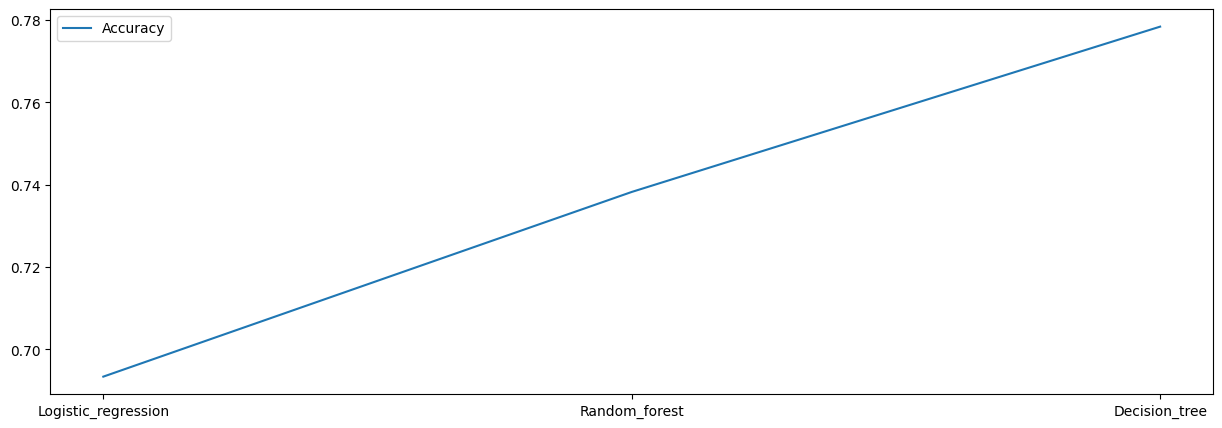

In [ ]:
import matplotlib.pyplot as plt

fig,ax=plt.subplots(figsize=(15,5))
plt.plot(FinalResult.Algorithm,accuracy,label="Accuracy")
plt.legend()
plt.show()

#**Data visualisation of prediction results**

---



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc


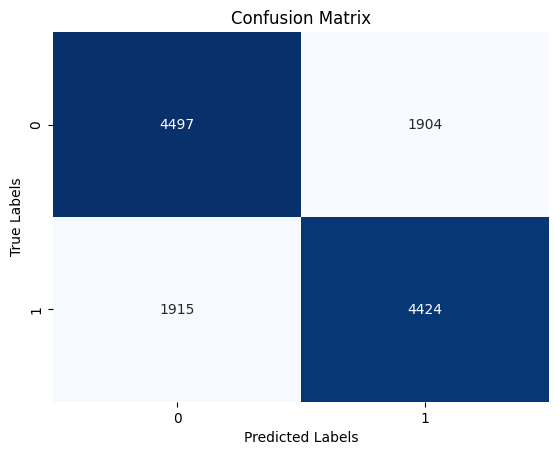

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_train, y_lr_train_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

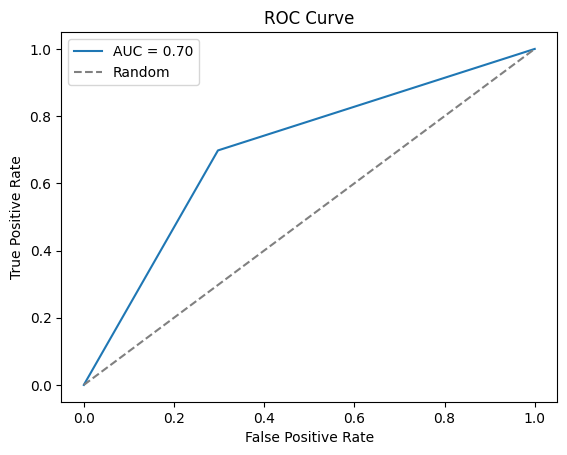

In [ ]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_train, y_lr_train_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

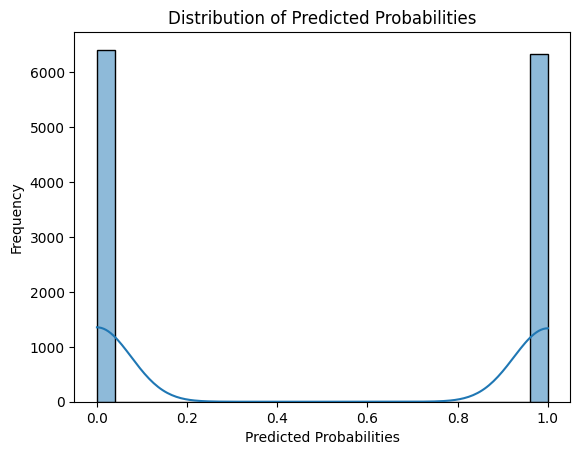

In [ ]:
# Probability Distribution Plots
sns.histplot( y_lr_train_pred, bins=25, kde=True)
plt.xlabel('Predicted Probabilities')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Probabilities')
plt.show()

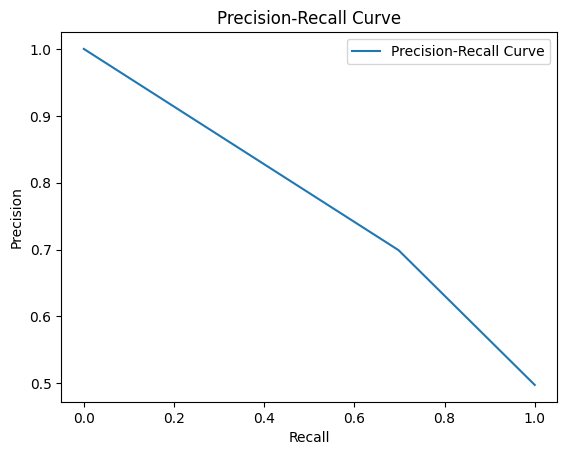

In [ ]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_train, y_lr_train_pred)
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()